--- Welcome to Project ISMEK --- 

Background

Recently, Istanbul Municipality has announced that they start publishing open data periodically; which was amazing news for me because I am really interested in the affairs of my homeland Turkey, more specificially my hometown Istanbul. Although I am continents away at the moment, I always follow the local news, join the online twitter discussions and advocate for the future of my city and country. 

As I started diving into the unchartered open data world in their website, I came across with this "ISMEK program participants" dataset. ISMEK stands for "İstanbul Büyükşehir Belediyesi Sanat ve Meslek Eğitimi Kursları" aka "Istanbul Municipality Art and Professional Education Institution". It is basically a continuing education center serving to Istanbul city folks.

After her retirement, My mother has also become their avid participants. She's registered their various handcrafting courses every year including knitting, wood painting and even aluminum relief art! 

Ismek have been serving our city with their 375 really high quality, and free-of-charge! courses from 39 different training fields. You could attend those programs for getting a new hobby, getting new friends or even changing your carrier. Opportunities endless!



Questions to Explore

I would like to analyse the ISMEK dataset for the following questions to be answered:
1. What is the demographic distribution of the participants? (To answer if are most of them retired aunties like my mom going there to socialize or are there actually people from various backgrounds?)
2. What are the most popular fields and programs?
3. What are the most popular course centers?
4. I know that there are two kinds of certificates given in these courses. MEB certificate and ISMEK participation certificate.
    - ISMEK participation certificate requires one to attend at least 75% of classes to receive the certificate.
    - MEB certificate requires you to attend at least 90% of classes AND pass the MEB exam with a grade of 50 out of 100 full grade.
    Based on this information, 
    4.a. Are there any courses that delivers both of the certificate types in the end?
5. I would like to examine Sports programs in great detail.
    
 5.a. What sport programs do ISMEK offer?
    
 5.b. What kind of certificate do people receive at the end of each Sports programs? 
    
 5.c. What characteristics of participants correlate with their likelihood of successfully completing a sports program (receiving a certificate = successfully completing a program)? 
6. What kind of personas do participants possess?


All these unanswered questions finally get answered today! 

I went ahead and downloaded the dataset into my computer. I use VScode & Python running Jupyter Notebook as my platform. The dataset came in CSV format which is pretty convenient for me to load. Only if It would go smoothly! When I attempt to load it in my notebook, dang! the default encoder failed. Since the dataset was only available in turkish, it make sense to face such a problem. I went ahead and changed the encoder to 'iso-8859-9' which will cover turkish language and also needed to change the seperator because guess what, this Comma Seperated Values (CSV) file was not quite comma seperated after all, it was "semi colon" seperated. Anyways; here is the dataset: 

In [216]:
import pandas
import json
#filtering python warnings for them not to be printed
import warnings
warnings.filterwarnings('ignore')


In [217]:
ismekdata = pandas.read_csv('/Users/sruya/Desktop/2019-2020-ismek-kursiyer.csv',sep=';', encoding='iso-8859-9')
display(ismekdata[:5])
print('Dataset lenght',len(ismekdata))
print('Education terms that data collected from', pandas.unique(ismekdata['Donem']))

,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi İlcesi,Tercih Sebebi,Yas Araligi
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti


Dataset lenght 216765
Education terms that data collected from ['2019-2020']



Okay, so as we get a sneak peak of dataset and its lenght; We can see that the dataset is combined from the data of 216.765 participants who studied in the ISMEK programs in the term 2019-2020. It is a pre-covid period so I suppose it will reflect the 'old normal' days :) 

I know that it will not be easy to follow for you unless I at least attempt to translate the column names into English:


In [218]:
ismekdata.rename({'Donem': 'Term', 'Egitim Durumu': 'EducationLevel', 
'Engel Durumu': 'DisabilityStatus', 'Alan': 'FieldOfTraining', 'Calisma Durumu': 'EmploymentStatus',
'Hak Edilen Belge Tipi': 'CertificateType', 'Kurs Merkezi': 'CenterName', 
'Kurs Merkezi İlcesi': 'CenterDistrict', 'Tercih Sebebi': 'PreferenceReason', 
'Yas Araligi': 'Age'}, axis=1, inplace=True)
display(ismekdata[:5])

,Term,EducationLevel,DisabilityStatus,EmploymentStatus,FieldOfTraining,Program,CertificateType,CenterName,CenterDistrict,PreferenceReason,Age
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti


Alright, It is going to be much easier for you to follow along now. 
Now, let's quickly check out if there is any missing value in any column: 

In [219]:
for i in ismekdata:
    MISSING = ismekdata[pandas.isnull(ismekdata[i])]
    nMISS = len(MISSING)
    print(f'There are {nMISS} missing values in the {i} column.')

There are 0 missing values in the Term column.
There are 0 missing values in the EducationLevel column.
There are 0 missing values in the DisabilityStatus column.
There are 0 missing values in the EmploymentStatus column.
There are 0 missing values in the FieldOfTraining column.
There are 0 missing values in the Program column.
There are 0 missing values in the CertificateType column.
There are 0 missing values in the CenterName column.
There are 0 missing values in the CenterDistrict column.
There are 0 missing values in the PreferenceReason column.
There are 0 missing values in the Age column.


Luckly, there are no missing values in this dataset. So we don't need to apply missing value handling methods. Yay!

As next step, I would like to attach the geocoordinates of the center disctricts so that I can create compelling Geospatial visualizaons later on my analysis. For that, I can use Google Maps GeoCoding API from the Google Cloud Platform. Although I had to connect my credit card info in order to activate the service, I was able to stay in their Free-tier limits with my very small number of requests (<100), so it was basically free of charge for me to gather this info.

Before requesting coordinates data from Google Maps Geocoding API, let's find out how many unique districts are we going to deal with:

In [220]:
pandas.unique(ismekdata['CenterDistrict'])
DISTRICTS = []
for i in pandas.unique(ismekdata['CenterDistrict']):
    DISTRICTS.append(i)
display(DISTRICTS)
print('# of unique districts:', len(DISTRICTS))
print('# of unique districts confirmation:', len(pandas.unique(DISTRICTS)))

['Sisli',
 'Silivri',
 'Tuzla',
 'Atasehir',
 'Bagcilar',
 'Kucukcekmece',
 'Gungoren',
 'Esenler',
 'Beylikduzu',
 'Sultanbeyli',
 'Sancaktepe',
 'Basaksehir',
 'Esenyurt',
 'Pendik',
 'Fatih',
 'Cekmekoy',
 'Uskudar',
 'Umraniye',
 'Eyupsultan',
 'Bahcelievler',
 'Sultangazi',
 'Kadikoy',
 'Sile',
 'Avcilar',
 'Buyukcekmece',
 'Kartal',
 'Zeytinburnu',
 'Bakirkoy',
 'Gaziosmanpasa',
 'Kagithane',
 'Arnavutkoy',
 'Maltepe',
 'Catalca',
 'Sariyer',
 'Beyoglu',
 'Beykoz',
 'Adalar']

# of unique districts: 37
# of unique districts confirmation: 37


So as we see, we have 37 unique districts that Ismek has a center in. 
Let's pick one of districts to retrieve their coordinate as a trial before attempting to bulk request. I am choosing 'Fatih' as my trial districts since it is my homedistrict at the same:

In [84]:
TrialDist = ['Fatih']

import requests
import json 
YOURKEY = 'ENTER YOUR GOOGLE CLOUD API KEY'
url = "https://maps.googleapis.com/maps/api/geocode/json?components=locality:Fatih|administrative_area:istanbul|country:TR&key={}".format(YOURKEY)
payload={}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)
fatihraw = response.text
fatih_json = json.loads(fatihraw)
display(fatih_json)
print('coordinates of Fatih:', fatih_json['results'][0]['geometry']['location'])

So as we see Fatih has following coordinates: {'lat': 41.020169, 'lng': 28.933864} and we are able to safely retrieve our data.
Let's retrieve coordinates of all the districts in bulk:

In [85]:
I create a default dictionary that will hold all of our districts with 
their respective coordinates:

from collections import defaultdict

ismeklocations = defaultdict()
for i in DISTRICTS:
    url = f'https://maps.googleapis.com/maps/api/geocode/json?components=locality:{i}|administrative_area:istanbul|country:TR&key={YOURKEY}'
    payload={}
    headers = {}
    response = requests.request("GET", url, headers=headers, data=payload)
    ismekraw = response.text
    ismek_json = json.loads(ismekraw)
    ismeklocations[i] = ismek_json['results'][0]['geometry']['location']


Alright, we successfully retrieved all the coordinates into a dictionary with respective district names as key. Let's write this object into a file to reference later. This way, we won't need to call Google Maps API everytime we load the notebook. 

In [86]:
#import pickle
#filehandler = open('ismeklocfile', 'wb') 
#pickle.dump(ismeklocations, filehandler)

Now it is time to attach those coordinates to our main ismekdata dataset to create Geodata and plotting it:

,Term,EducationLevel,DisabilityStatus,EmploymentStatus,FieldOfTraining,Program,CertificateType,CenterName,CenterDistrict,PreferenceReason,Age,lat,lng,geometry
0,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde İlerlemek",20-30 Yas Arasi,41.053622,28.981973,POINT (28.98197 41.05362)
1,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi,41.073678,28.247868,POINT (28.24787 41.07368)
2,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde İlerlemek",30-40 Yas Arasi,40.898230,29.359878,POINT (29.35988 40.89823)
3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,40.983333,29.127778,POINT (29.12778 40.98333)
4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti,40.983333,29.127778,POINT (29.12778 40.98333)


Text(0.5, 1.0, 'Districts that have at least one ISMEK center in')

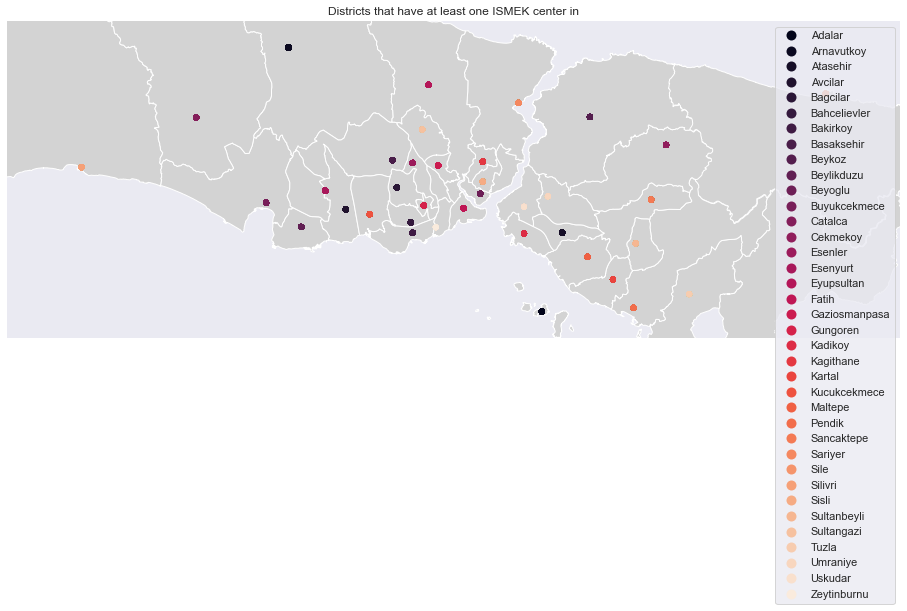

In [221]:
#load the coordinates data saved to file first:
import pickle 
filehandler = open('ismeklocfile', 'rb') 
ismekloc = pickle.load(filehandler)

#Appending coordinates to the respective districts:
lat = []
lng = []
for i in ismekdata['CenterDistrict']:
    lat.append(ismekloc[i]['lat'])
    lng.append(ismekloc[i]['lng'])
ismekdata['lat'] = lat
ismekdata['lng'] = lng

#Converting dataframe to geodataframe
import geopandas
import geoplot
from shapely.geometry import shape
ismekdata = geopandas.GeoDataFrame(ismekdata,geometry= geopandas.points_from_xy(ismekdata['lng'], ismekdata['lat']))
display(ismekdata[:5])

#Taking advantage of this Github rep for Istanbul's neighborhoods geojson data to have istanbul's base map : https://github.com/izzetkalic/geojsons-of-turkey/blob/master/geojsons/istanbul-admin-level-6.geojson
istanbul_districts = json.load(open('/Users/sruya/Desktop/istanbul-admin-level-6.geojson'))
geom = [shape(i['geometry']) for i in istanbul_districts['features']]
istanbul_districts = geopandas.GeoDataFrame({'geometry':geom})

#plotting all districts that Ismek has a center in on istanbul's map 
import geoplot.crs as gcrs
ax = geoplot.polyplot(istanbul_districts, projection=gcrs.WebMercator(), edgecolor='white', facecolor='lightgray', figsize= (16,12))
geoplot.pointplot(ismekdata, ax=ax, hue='CenterDistrict', legend=True)

#import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("Districts that have at least one ISMEK center in")


Alright now, I want to explore value distributions of attributes in this dataset. For that, My program will visit each of the column with a for loop
and retrieve all of their percentage (%) frequency if there are up to 10 unique types for that respective column, if not, then it will print only print the first five types:

In [222]:
for i in ismekdata.columns[1:11]:
    nTYPE = len(pandas.unique(ismekdata[i]))
    ATTR = i
    COUNTS = ismekdata[i].value_counts(normalize=True)*100
    if nTYPE <=10:
        print(f'{nTYPE} types of {ATTR} represented in this dataset. Their % distribution as follows:\n {COUNTS}\n')
    else:
        COUNTS = ismekdata[i].value_counts(normalize=True)[:10]*100
        print(f'{nTYPE} types of {ATTR} represented in this dataset. First ten types by their % distribution as follows:\n {COUNTS}\n')

10 types of EducationLevel represented in this dataset. Their % distribution as follows:
 Lisans                    40.658317
Lise                      20.596499
On Lisans                 15.451757
Ilkokul                    7.492907
Yuksek Lisans              5.962678
Ilkogretim                 5.540101
Meslek Lisesi              3.107974
Doktora                    0.503771
Okur Yazar                 0.431804
Okuma Yazma Bilmiyorum     0.254192
Name: EducationLevel, dtype: float64

6 types of DisabilityStatus represented in this dataset. Their % distribution as follows:
 Engeli Olmayan     98.769635
Ortopedik           0.419809
Suregen             0.403202
GOrme               0.148087
isitme              0.129633
Konusma Guclugu     0.129633
Name: DisabilityStatus, dtype: float64

5 types of EmploymentStatus represented in this dataset. Their % distribution as follows:
 Calismiyor    47.577792
Calisiyor     26.937006
Ogrenci       22.099509
Emekli         2.653565
Bos            0.732


Wait! I have realized that there are actually missing values in the EmploymentStatus attributed, they are coded as "Bos" aka "Blank". So I will ignore them for the accuracy of my analysis. 

In [223]:
ismekmissing= ismekdata[ismekdata['EmploymentStatus']== 'Bos']
ismekdata.drop(ismekdata.index[ismekdata['EmploymentStatus']== 'Bos'], inplace=True)

# Let's recalculate the distribution of attribute values in the new version of our dataset:
print(f'New version of the dataset includes info of {len(ismekdata)} of participants now.')
for i in ismekdata.columns[1:11]:
    nTYPE = len(pandas.unique(ismekdata[i]))
    ATTR = i
    COUNTS = ismekdata[i].value_counts(normalize=True)*100
    if nTYPE <=10:
        print(f'{nTYPE} types of {ATTR} represented in this dataset. Their % distribution as follows:\n {COUNTS}\n')
    else:
        COUNTS = ismekdata[i].value_counts(normalize=True)[:10]*100
        print(f'{nTYPE} types of {ATTR} represented in this dataset. First ten types by their % distribution as follows:\n {COUNTS}\n')

New version of the dataset includes info of 215178 of participants now.
10 types of EducationLevel represented in this dataset. Their % distribution as follows:
 Lisans                    40.958183
Lise                      20.748404
On Lisans                 15.565718
Ilkokul                    6.810640
Yuksek Lisans              6.006655
Ilkogretim                 5.580961
Meslek Lisesi              3.130896
Doktora                    0.507487
Okur Yazar                 0.434989
Okuma Yazma Bilmiyorum     0.256067
Name: EducationLevel, dtype: float64

6 types of DisabilityStatus represented in this dataset. Their % distribution as follows:
 Engeli Olmayan     98.760561
Ortopedik           0.422906
Suregen             0.406175
GOrme               0.149179
isitme              0.130590
Konusma Guclugu     0.130590
Name: DisabilityStatus, dtype: float64

4 types of EmploymentStatus represented in this dataset. Their % distribution as follows:
 Calismiyor    47.928692
Calisiyor     27.135

Insights we can derive from these lines as follows:
    - Top three popular fields of training by number of participants are as IT with ~42%, Sport with ~11% and Graphical and Technical Design with ~7%. 

    - ~41% of participants hold an undergraduate degree, ~21% holds a high school degree and ~16% holds a college degree. Such high literacy among participants makes sense given we just discovered that the most popular field of training being "information technologies" field with frequency of ~42%. 

    - Majority of participants (~61%) stated that their participation reason is "Advancing in their career", following them, other top two reasons include "Improving their Arts, Music or Sports skills" by ~20% and "Generating extra Income through Production, using the training obtained from the course" by ~12%. Basically, most people really participate these courses for monetary concerns.

    - Understandably, majority of people (47.5%) were not employed during their course partipation. Following that, ~27% people declared that they are employed and ~22% of people said they are students. Interestingly, retired people like my mom were actually really minorities in these courses, with only being in ~3% of total participants. Let's not fall into quick misleading conclusions since we see that "retired people friendly" fields such as the "Knitting and Embroidery Arts" makes up only the ~4% of all participants. We will dive into detailed analysis soon. 

    - ~98.8% of all participants reported no disability status, following 0.42% with orthopedic disability. 

    - Top three most popular center districts are as follows: Esenler  with ~51%, Fatih with ~3.73%, and Kartal with ~3.72%.

    - Long distance education center in Esenler district has been the most popular center making up ~48% of all participation. That means that even in the pre-covid times, Online Education delivering programs have been more popular than in-person education.

    - Most of the participants are between 20 - 30 y.old with a distribution of ~43%, 
        - following them 30-40 y.olds by ~23%, and 
        - 40-50 y.old by ~17% of all participants.

    - Lastly, majority of participants by ~59% could not succeed to receive a certificate whereas ~25% of participants represented in this dataset have received an 'Ismek Certificate' and ~17% of them received an 'Meb Certificate'. 

Here in the following visualization, we can again confirm that IT (Bilisim Teknolojileri), Sports (Spor) and Graphical & Technical Design (Grafik ve Teknik Tasarim) training fields have indeed received overwhelmingly big number of participation.

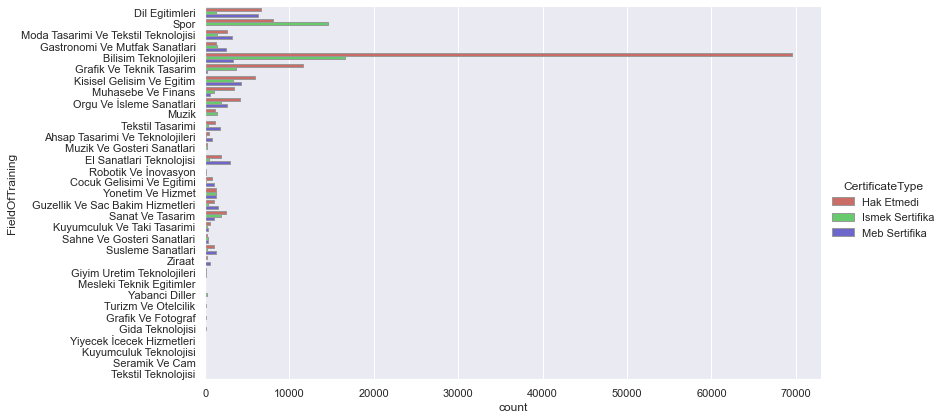

In [224]:
ismekplot = sns.catplot(y="FieldOfTraining", hue="CertificateType", kind="count",
            palette='hls', edgecolor=".6",
            data=ismekdata, height = 6, aspect = 2)

Now, to answer to my question 4, I would like to examine courses by their certificate types a little closer. 
Let's first see if any courses would deliver both of certificate types out of 'Meb' and 'Ismek' certificates. 
Note that 'Hak Etmedi' category doesn't mean a certificate type but instead, it means 'Failed to receive a certificate'

In [225]:
certs = ismekdata[(ismekdata['CertificateType']== 'Ismek Sertifika') | (ismekdata['CertificateType']== 'Meb Sertifika')].groupby(["Program", "CertificateType"])['CertificateType'].count()
certs = pandas.DataFrame(certs).rename(columns={'CertificateType':'Count'}).reset_index()
certs = certs.groupby(by = ['Program'])['CertificateType'].count()
certs = certs.loc[[x>1 for x in certs]]
display(certs)
print("There are", len(certs), "programs that deliver both type of certificates")

Program
Arapca A1 Seviyesi                   2
Arapca A2 Seviyesi                   2
Ceyiz Urunleri Hazirlama             2
Dekoratif Ahsap Susleme              2
Igne Oyasi                           2
Ingilizce A1 Seviyesi                2
Resim 1. Seviye (Guaj Boya Resim)    2
Salon Takimlari Dikimi               2
Tabii Kumas Cicek Yapma              2
Taki Tasarim Ve Yapim Teknikleri     2
Name: CertificateType, dtype: int64

There are 10 programs that deliver both type of certificates


As we can see above, there are actually 13 programs that delivers both of the certificates. 

Now, I would like to examine the sports field datapoints closely. 
Since It is also the second most popular training field and its location dependant (all sports programs delivers in person education), It will help me compare behaviors/patterns across different neighborhoods of Istanbul.

In [226]:
print('Total Number of Participants:', len(ismekdata[ismekdata['FieldOfTraining']== 'Spor']))
print('Number of Districts offering Sports programs:',  len(ismekdata[ismekdata['FieldOfTraining']== 'Spor'].groupby(['CenterDistrict'])))


Total Number of Participants: 22624
Number of Districts offering Sports programs: 18


First, I would like to plot the failure rates across neighborhoods. In order to do that:
- I will find:
    - the number of people who failed to received a certificate,
    - the number of people who successfully received a certificate. 
- Later, I will calculate the percentage of people failed in each districted by (failure count/all participants)*100

In [227]:
#Filtering all the datapoints belongs to Sports field:
sports = ismekdata.loc[(ismekdata['FieldOfTraining']== 'Spor')]

#Grouping failed sports program participants and finding their counts per district:
failedsports = sports.loc[sports['CertificateType'] == 'Hak Etmedi']
failedcounts = failedsports.groupby(['CenterDistrict']).size().reset_index()
failedcounts.rename(columns = {0:'NumOfPeopleFailed'}, inplace=True)

#Grouping succeeded sports program participants and finding their counts per district:
successsports = sports.loc[(sports['CertificateType'] == 'Ismek Sertifika')| (sports['CertificateType'] == 'Meb Sertifika')]
successcounts = successsports.groupby(['CenterDistrict']).size().reset_index()
successcounts.rename(columns = {0:'NumOfPeopleSucceeded'}, inplace=True)


After finding the success and failure counts of each district , let's see merge both success & fail counts table with an inner join. 
Then, calculate the percentage of failure rates:

In [228]:
#Merging failure counts and success counts tables:
sportscounts = pandas.merge(failedcounts, successcounts, how = 'inner')

#calculating percentage of failures and rounding it 
sportscounts['PercOfPeopleFailed'] = round((sportscounts['NumOfPeopleFailed']/(sportscounts['NumOfPeopleFailed']+sportscounts['NumOfPeopleSucceeded']))*100,1)

#Let's also add geometry column into play for geoplotting:
sportsperc = pandas.merge(sportscounts, sports[['CenterDistrict', 'geometry']], how = 'right')
sportsperc = sportsperc.drop_duplicates()
sportsperc = geopandas.GeoDataFrame(sportsperc)
display(sportsperc)

,CenterDistrict,NumOfPeopleFailed,NumOfPeopleSucceeded,PercOfPeopleFailed,geometry
0,Silivri,79,1283,5.8,POINT (28.24787 41.07368)
1,Atasehir,513,465,52.5,POINT (29.12778 40.98333)
5,Gungoren,48,1552,3.0,POINT (28.87424 41.02055)
8,Umraniye,748,814,47.9,POINT (29.10136 41.03333)
9,Tuzla,11,2112,0.5,POINT (29.35988 40.89823)
14,Sultangazi,220,134,62.1,POINT (28.87133 41.12558)
15,Sultanbeyli,911,821,52.6,POINT (29.26201 40.96842)
20,Kartal,2850,2343,54.9,POINT (29.22045 40.91840)
24,Gaziosmanpasa,706,718,49.6,POINT (28.90045 41.07596)
29,Kucukcekmece,956,535,64.1,POINT (28.77534 41.00866)


Let's now visualize percentage of people failed in sports programs by districts. The Bigger & more red the circle representing a district, the more people have failed from that district:

Text(0.5, 1.0, 'Percentage of failure per district in Sports programs of ISMEK')

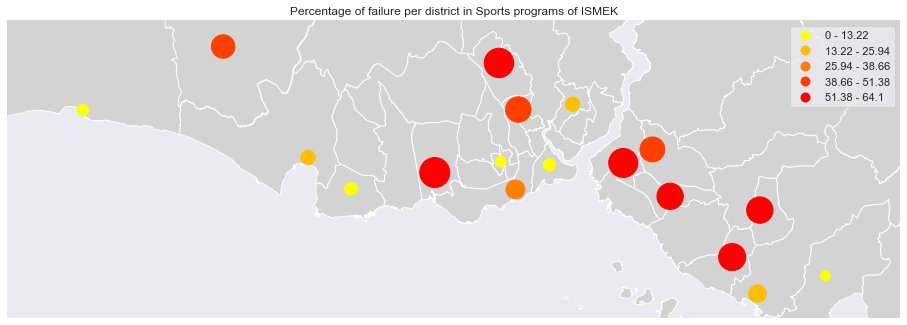

In [229]:
ax = geoplot.polyplot(
    istanbul_districts, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(16, 12))

geoplot.pointplot(
    sportsperc, ax=ax, scale = 'PercOfPeopleFailed', limits=(10, 30), projection=gcrs.AlbersEqualArea(),
    hue = 'PercOfPeopleFailed', cmap = 'autumn_r',
    scheme = 'EqualInterval',
    legend=True)

plt.title("Percentage of failure per district in Sports programs of ISMEK")


Now, I would like to disclose the relation between the characteristics of sports program participants (Education Level, Disability Status, Employment Status, Center District they attend to, Preference Reason) and the Certificate type they received. 

For that, I will conduct Crammer's V test. It is used to check association between categorical variables and it is more reliable than Chi-Square test when applied to large datasets such mine where a weak association can exist but Chi-Square would assume it to be zero.

In [230]:
# Import association_metrics:  
import association_metrics as am

# Convert str columns to Category columns:
sports_subset = sports[['EducationLevel','DisabilityStatus', 'EmploymentStatus', 'CenterDistrict', 'PreferenceReason', 'Age','CertificateType']].apply(
        lambda x: x.astype("category") if x.dtype == "O" else x)

# Initialize a CamresV object using you pandas.DataFrame:
cramersv = am.CramersV(sports_subset)


# Return a pairwise matrix filled with Cramer's V, where columns and index are the categorical variables of the passed pandas.DataFrame:
cramersv.fit()

,EducationLevel,DisabilityStatus,EmploymentStatus,CenterDistrict,PreferenceReason,Age,CertificateType
EducationLevel,1.000000,0.044344,0.196755,0.080500,0.070083,0.194379,0.020391
DisabilityStatus,0.044344,1.000000,0.018168,0.044477,0.015244,0.019868,0.021866
EmploymentStatus,0.196755,0.018168,1.000000,0.106204,0.053502,0.422932,0.035484
CenterDistrict,0.080500,0.044477,0.106204,1.000000,0.078310,0.094429,0.486201
PreferenceReason,0.070083,0.015244,0.053502,0.078310,1.000000,0.064980,0.019391
Age,0.194379,0.019868,0.422932,0.094429,0.064980,1.000000,0.042463
CertificateType,0.020391,0.021866,0.035484,0.486201,0.019391,0.042463,1.000000


Let's plot these correlation figures into heatmap to examine better visually:

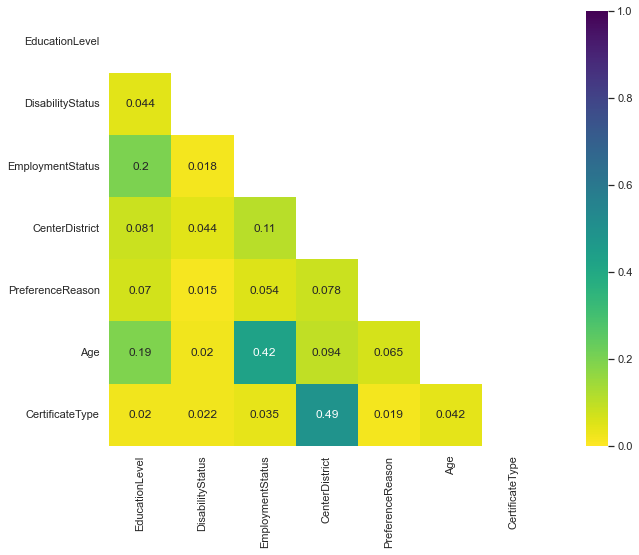

<Figure size 576x864 with 0 Axes>

In [231]:
crammers_v = cramersv.fit()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.zeros_like(crammers_v)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(crammers_v, mask=mask,vmin=0., vmax=1, square=True, cmap = 'viridis_r', annot = True)

plt.figure(figsize = (8,12))

plt.show()

As we see from the visualization, 
- There is a strong association (0.49/1) between the district that participant lives in and the certificate type they received.
- Another worth to mention weak association (0.11/1) between the center district and participant's employment status. 
Indeed, these relationships does make sense because districts of Istanbul are fairly segregated according to people's socioeconomical backgrounds. There are high earner/highly educated people living districts like Atasehir or low earner/less educated people living districts like Sultangazi or Gungoren.

After these initial insights I am now even more curious about the personas of participants. To detect them,
I would like to build a clustering algorithm using k-modes clustering algorithm. 
K-modes is the k-means algorithm's equivalent for categorical data. The methodology is the same, only Mode replaces the Mean in the data:
1. Pick K observations at random or any other methodology that could be superior to random initialization (In this case, Cao's method sounds more promising. link to their paper: https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.474.8181&rep=rep1&type=pdf) and use them as initial main clusters
2. Calculate the number of mismatches of each initial cluster with the rest of the observations and assign each observation to its closest cluster
3. Find new modes for the clusters
4. Repeat 2–3rd steps until there are is no re-assignment required

To apply this algorithm to our dataset, Let's install and load the required packages first:

In [ ]:
import sys
!{sys.executable} -m pip install kmodes
from kmodes.kmodes import KModes

Okay now, in order to build our participants clustering algorithm accurately, we need to omit the geo coordinates, program location, program details (too granular category, field of training will be sufficient for our analysis), certificate type and term infos:

In [211]:
ismekdatalean = ismekdata[["EducationLevel", "Age", "DisabilityStatus", "EmploymentStatus", "PreferenceReason", "FieldOfTraining"]]

#convert datatypes to category:
ismekdatalean = ismekdatalean.astype('category')

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1,20)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", verbose=1)
    kmode.fit_predict(ismekdatalean)
    cost.append(kmode.cost_)

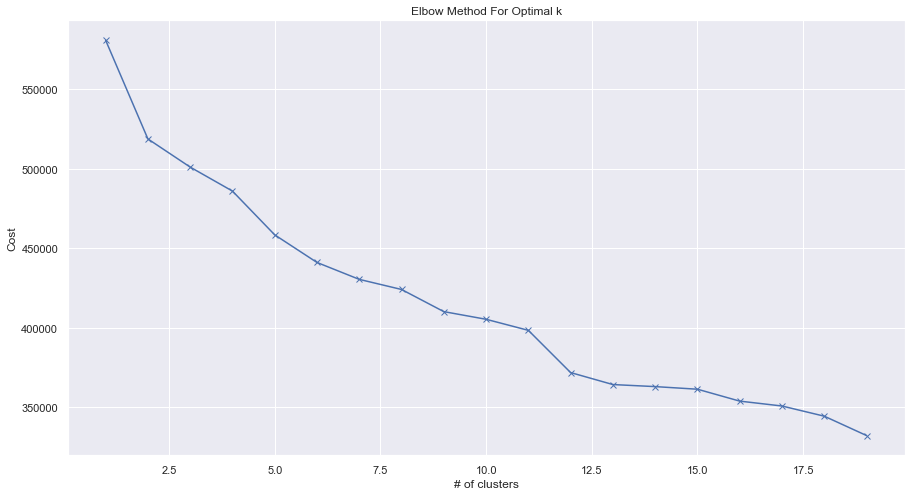

In [170]:
plt.plot(K, cost, 'bx-')
plt.xlabel('# of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We see that there are two candidate clusters that the cost doesn't decrease as dramatically after; Cluster 5 and Cluster 12. Let's view their differences to decide: So seperating our dataset into 12 clusters will work optimally for us:

In [212]:
print(pandas.DataFrame([c for c in cost], columns= ['Cost'], index = [f"Cluster {cl}" for cl in range(0,19)]), "\n")
print("Decrease in cost from Cluster 4 to Cluster 5\n", cost[3]-cost[4])
print("Decrease in cost from Cluster 11 to Cluster 12\n", cost[10]-cost[11])

                Cost
Cluster 0   580935.0
Cluster 1   518848.0
Cluster 2   501143.0
Cluster 3   486056.0
Cluster 4   458533.0
Cluster 5   441168.0
Cluster 6   430540.0
Cluster 7   424184.0
Cluster 8   410256.0
Cluster 9   405443.0
Cluster 10  398490.0
Cluster 11  371936.0
Cluster 12  364397.0
Cluster 13  363109.0
Cluster 14  361472.0
Cluster 15  353984.0
Cluster 16  350910.0
Cluster 17  344509.0
Cluster 18  332344.0 

Decrease in cost from Cluster 4 to Cluster 5
 27523.0
Decrease in cost from Cluster 11 to Cluster 12
 26554.0


So seperating our dataset into 5 clusters will work optimally for us:

In [179]:
# Building the model with 5 clusters
kmode = KModes(n_clusters=5, init = "Cao", verbose=1)
clusters = kmode.fit_predict(ismekdatalean)
clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16342, cost: 458533.0


array([0, 1, 2, ..., 0, 0, 1], dtype=uint16)

In [213]:
# inserting what cluster each observation belongs to, into our dataset
ismekdatalean.insert(0, "Cluster", clusters, True)

In [214]:
display(ismekdatalean[ismekdatalean['Cluster']== 0][:1])

,Cluster,EducationLevel,Age,DisabilityStatus,EmploymentStatus,PreferenceReason,FieldOfTraining
0,0,Lisans,20-30 Yas Arasi,Engeli Olmayan,Ogrenci,"Meslek Edinmek, Meslegimde İlerlemek",Dil Egitimleri


Well, these clusters make good sense to me now. Let me explain why:

Cluster 0: People in this cluster are in between 20-30 y. old, holding undergraduate degrees and yet they are still student; aiming for even more advanced degrees. As expected, they select "advancing my career" option as their preference reason. Their favorite programs in ISMEK are generally in the language education field. I will call these people "Young High Achievers"

In [215]:
display(ismekdatalean[ismekdatalean['Cluster']== 1][:1])

,Cluster,EducationLevel,Age,DisabilityStatus,EmploymentStatus,PreferenceReason,FieldOfTraining
1,1,Lise,20-30 Yas Arasi,Engeli Olmayan,Calismiyor,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",Spor



Cluster 1: People who are in between ages 20 - 30, high school graduate and not employed; with a preference reason of advancing their art, music and sports skills. I will call them "High school graduated Homemakers". 

They sound like they are young & energetic, want to feel fulfilled and homemaking does not quite fulfill them and they want to fulfill themselves through these art, music, sports classes; or they are bored at home and probably seek for socializing through these courses. They are most likely women too. This is a very steriotypical persona in Turkey. 

In [195]:
display(ismekdatalean[ismekdatalean['Cluster']== 2][:1])

,Cluster,EducationLevel,Age,DisabilityStatus,EmploymentStatus,PreferenceReason,FieldOfTraining
2,2,Lisans,30-40 Yas Arasi,Engeli Olmayan,Ogrenci,"Meslek Edinmek, Meslegimde İlerlemek",Dil Egitimleri


Cluster 2: People who are in between ages 30-40, has an undergraduate degree and yet; still a student; with a preference reason of advancing their career, or starting a new career. It looks like these people are also looking for better work conditions, better paying job opportunities, a more fulfilling career; but they can actually afford to become a fulltime student again. Then, probably I can call these Cluster 2 members as "Mature High Achievers"

In [196]:
display(ismekdatalean[ismekdatalean['Cluster']== 3][:1])

,Cluster,EducationLevel,Age,DisabilityStatus,EmploymentStatus,PreferenceReason,FieldOfTraining
157,3,On Lisans,20-30 Yas Arasi,Engeli Olmayan,Calisiyor,"Meslek Edinmek, Meslegimde İlerlemek",Dil Egitimleri


Cluster 3: People who are in between ages 20-30, 2 years of college graduate and working; with a preference reason of advancing their career, or starting a new career. This is also a very typical persona in my opinion. They sound like people who stuck in low to middle income levels (probably due to their lower education level) and want to change careers for a better paying career path or get more education to advance their careers. I will call them "Trapped Better Pay Seekers"

In [197]:
display(ismekdatalean[ismekdatalean['Cluster']== 4][:1])

,Cluster,EducationLevel,Age,DisabilityStatus,EmploymentStatus,PreferenceReason,FieldOfTraining
8,4,Lisans,40-50 Yas Arasi,Engeli Olmayan,Calismiyor,Uretim Yaparak Gelir Elde Etmek,Gastronomi Ve Mutfak Sanatlari


Cluster 4: Lastly, This cluster's people who are in between ages 40-50 y.old, have undergraduate degrees but are not employed; with a preference reason of "Generating income through production" These people sound like they want to become self employed by learning how to produce stuff. Maybe they are fresh retirees (in the old generations, legal retirement age can be as low as by 40 y.old -- lucky them) I will call them "Enterpreneurs" 

Apparently, My assumption of Ismek centers being a clubhouse for seniors like my mom - attending the classes for socializing/ getting new hobbies. Kuddos to her, she is a minority. 

This is the end of my analysis, thanks for your time!